### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:
dataset = pd.read_csv('data/stud.csv', sep=',')

In [4]:
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
dataset.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
dataset.duplicated().sum()

np.int64(0)

In [8]:
dataset.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
dataset.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### EDA (Exploratory Data Analysis)

In [10]:
### EDA (Exploratory Data Analysis)

##gender

print("Categoeries gender: ", dataset['gender'].unique())

##race_ethnicity

print("Categoeries race_ethnicity: ", dataset['race_ethnicity'].unique())

##parental_level_of_education     

print("Categoeries parental_level_of_education     : ", dataset['parental_level_of_education'].unique())

##lunch     

print("Categoeries lunch     : ", dataset['lunch'].unique())

##test_preparation_course     

print("Categoeries test_preparation_course     : ", dataset['test_preparation_course'].unique())



Categoeries gender:  ['female' 'male']
Categoeries race_ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categoeries parental_level_of_education     :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categoeries lunch     :  ['standard' 'free/reduced']
Categoeries test_preparation_course     :  ['none' 'completed']


In [11]:
## define numeric and categorical columns

numeric_features = [ f for f in dataset.columns if dataset.dtypes[f] != 'object']

categorial_features = [ f for f in dataset.columns if dataset.dtypes[f] == 'object']

print("Numeric features: ", numeric_features)

print("Categorial features: ", categorial_features)

Numeric features:  ['math_score', 'reading_score', 'writing_score']
Categorial features:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
## create total and avrage score features

dataset['total_score'] = dataset['math_score'] + dataset['reading_score'] + dataset['writing_score']

dataset['average_score'] = dataset['total_score'] / 3

dataset.head()




,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
math_score_full = dataset[dataset['math_score']==100]['average_score'].count()
reading_score_full = dataset[dataset['reading_score']==100]['average_score'].count()
writing_score_full = dataset[dataset['writing_score']==100]['average_score'].count()

print("Total students with math_score_full full score: ", math_score_full)
print("Total students with reading_score_full full score: ", reading_score_full)
print("Total students with writing_score_full full score: ", writing_score_full)

Total students with math_score_full full score:  7
Total students with reading_score_full full score:  17
Total students with writing_score_full full score:  14


## Visualization

<Axes: xlabel='average_score', ylabel='Count'>

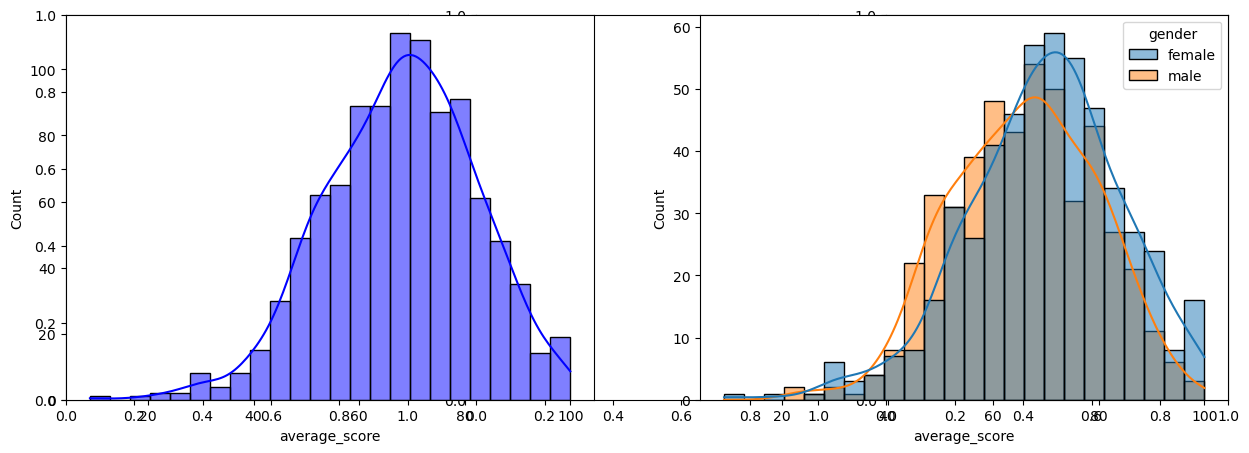

In [14]:
##average_score histogram

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(121)

sns.histplot(data=dataset, x='average_score', kde=True, color='blue')

plt.subplot(122)

sns.histplot(data=dataset, x='average_score', kde=True,hue='gender')

<Axes: xlabel='average_score', ylabel='Count'>

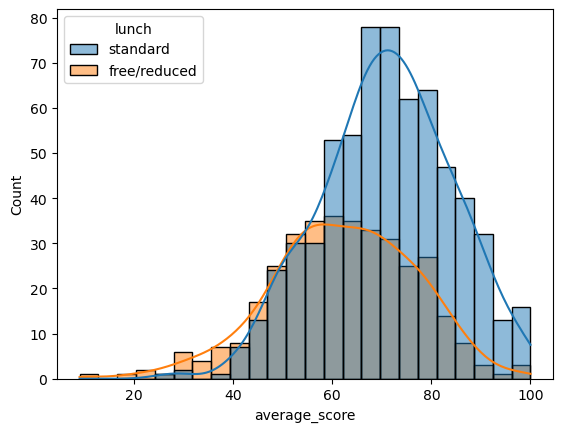

In [15]:
sns.histplot(data=dataset,x='average_score',kde=True,hue='lunch')

<Axes: xlabel='average_score', ylabel='Count'>

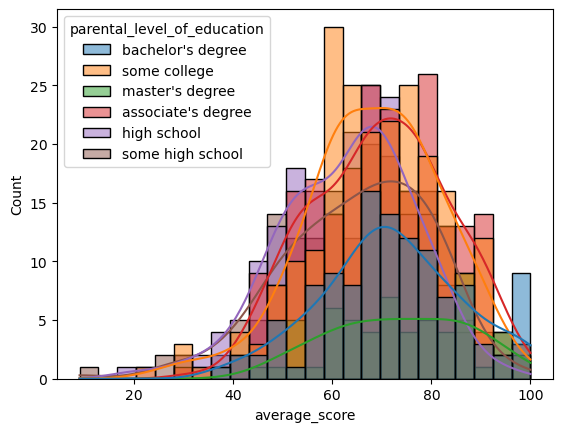

In [16]:
sns.histplot(data=dataset,x='average_score',kde=True,hue='parental_level_of_education')

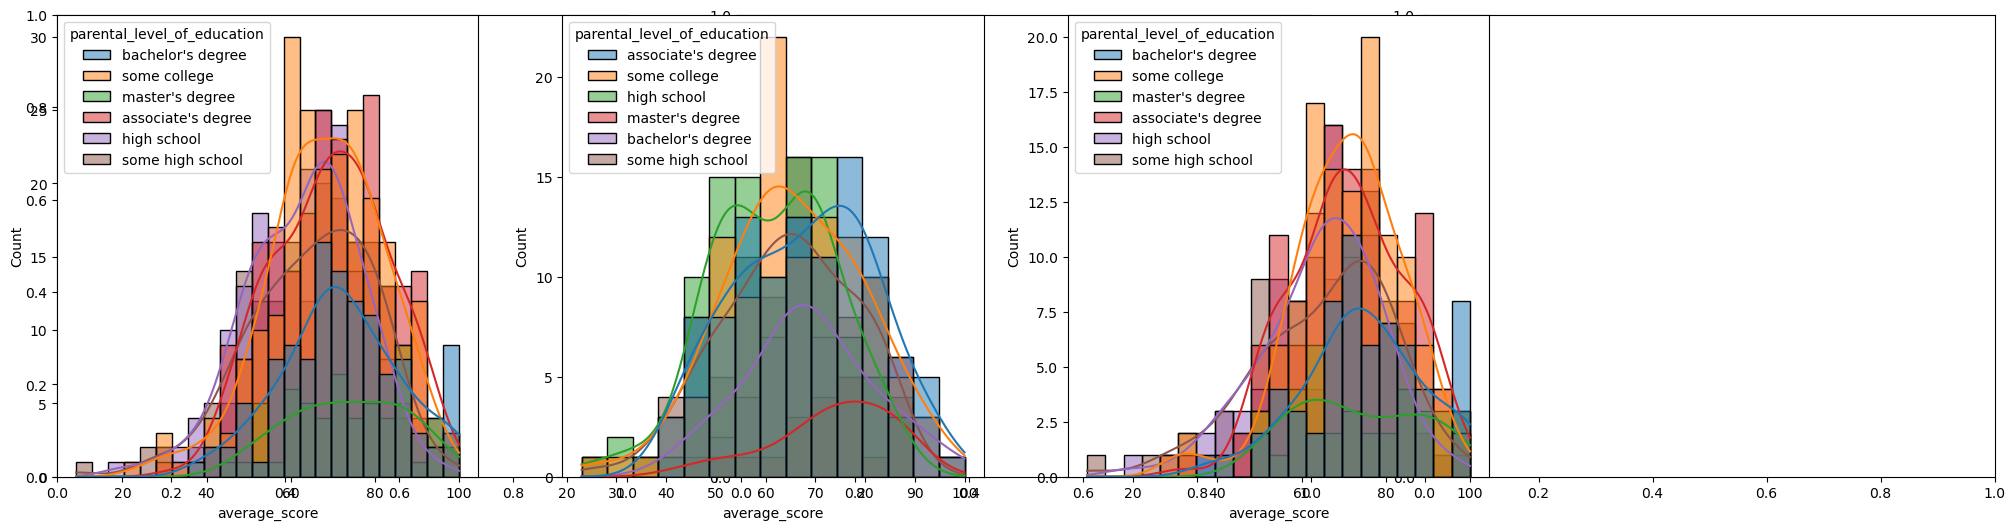

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)

ax1 =sns.histplot(data=dataset,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)

ax2 =sns.histplot(data=dataset[dataset.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)

ax3 =sns.histplot(data=dataset[dataset.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

Text(0.5, 1.0, 'race_ethnicity')

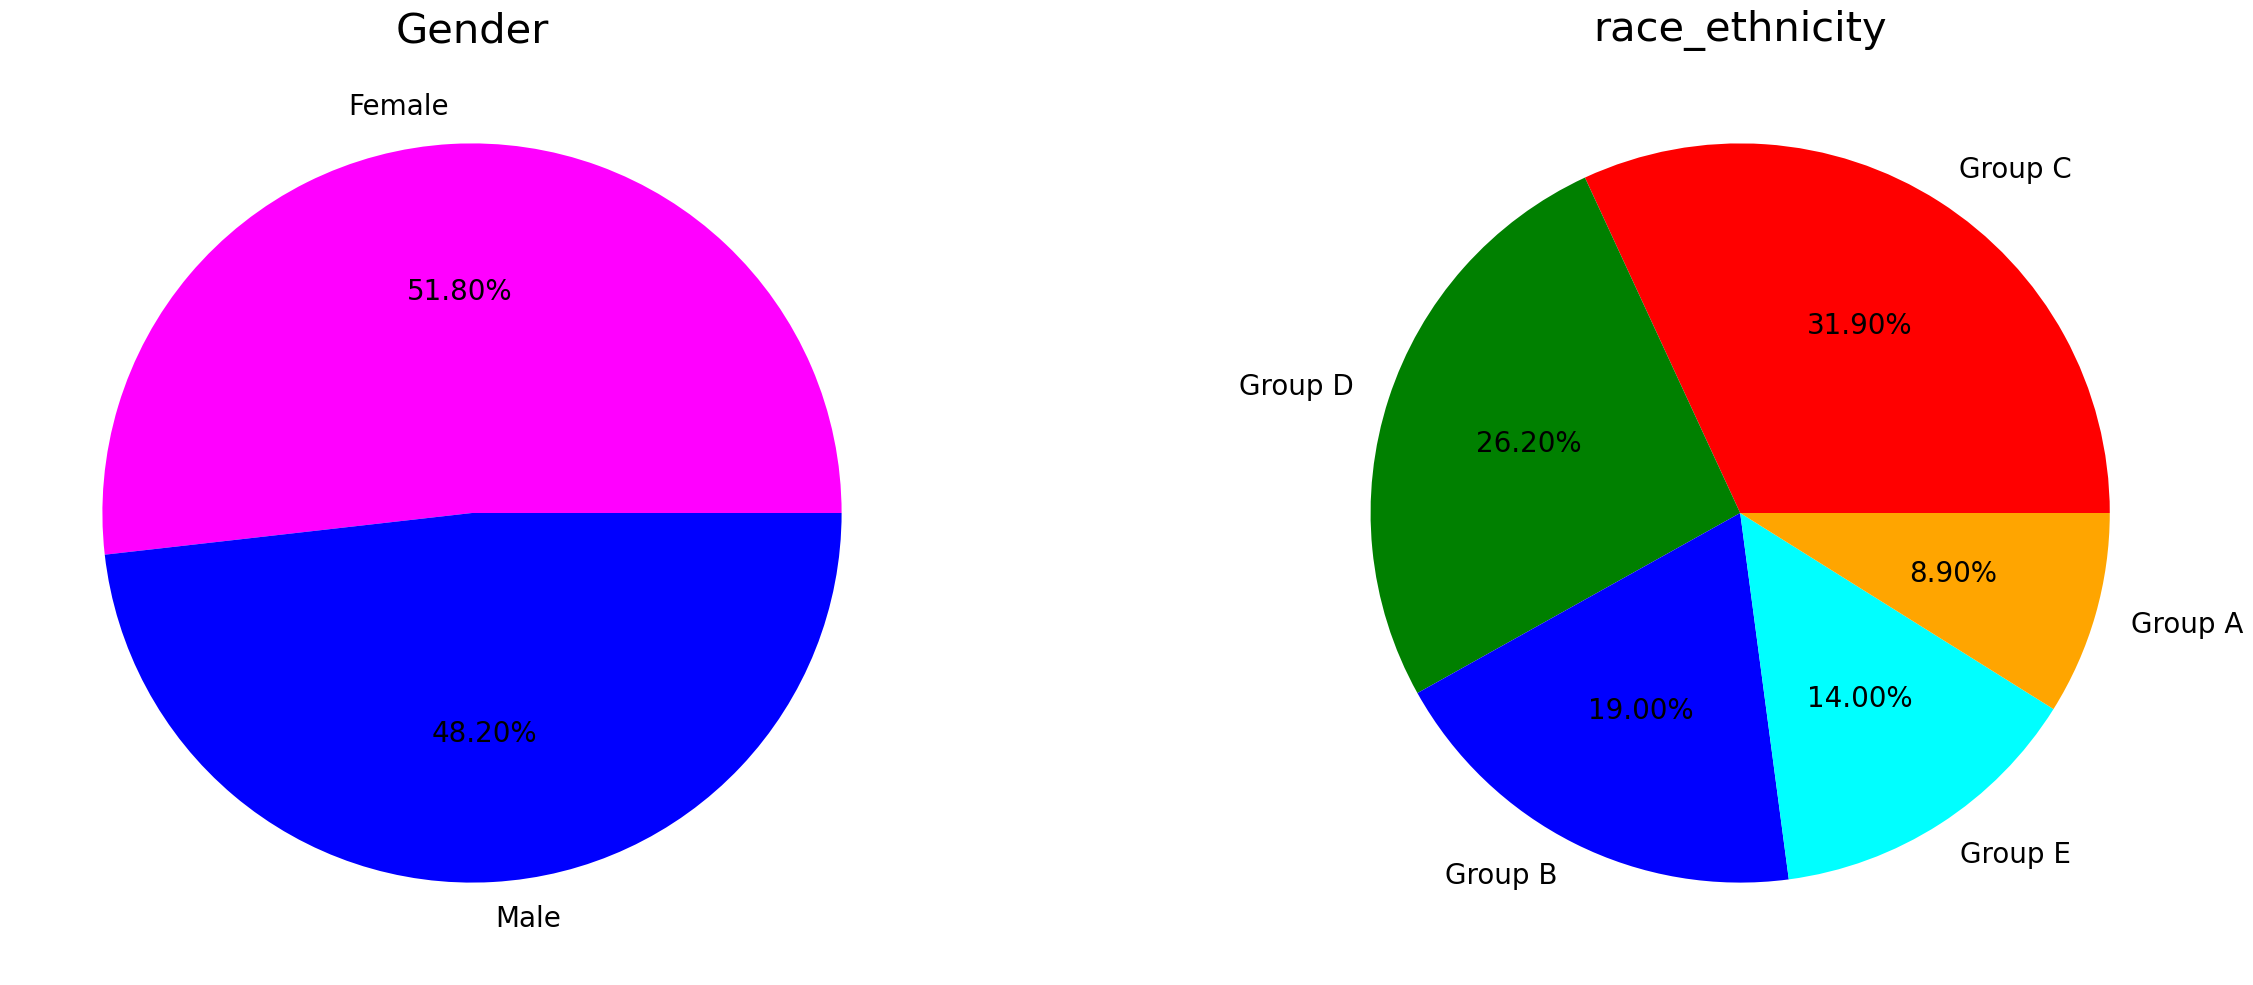

In [63]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 2, 1)
size = dataset['gender'].value_counts()
labels = 'Female', 'Male'
color = ['fuchsia','Blue']
plt.pie(size, colors = color, labels = labels,autopct = '%2.2f%%',textprops={'fontsize': 20})
plt.title('Gender', fontsize = 30)
plt.axis('off')



plt.subplot(1, 2, 2)
size = dataset['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '%2.2f%%',textprops={'fontsize': 20})
plt.title('race_ethnicity', fontsize = 30)
# plt.axis('off')







(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

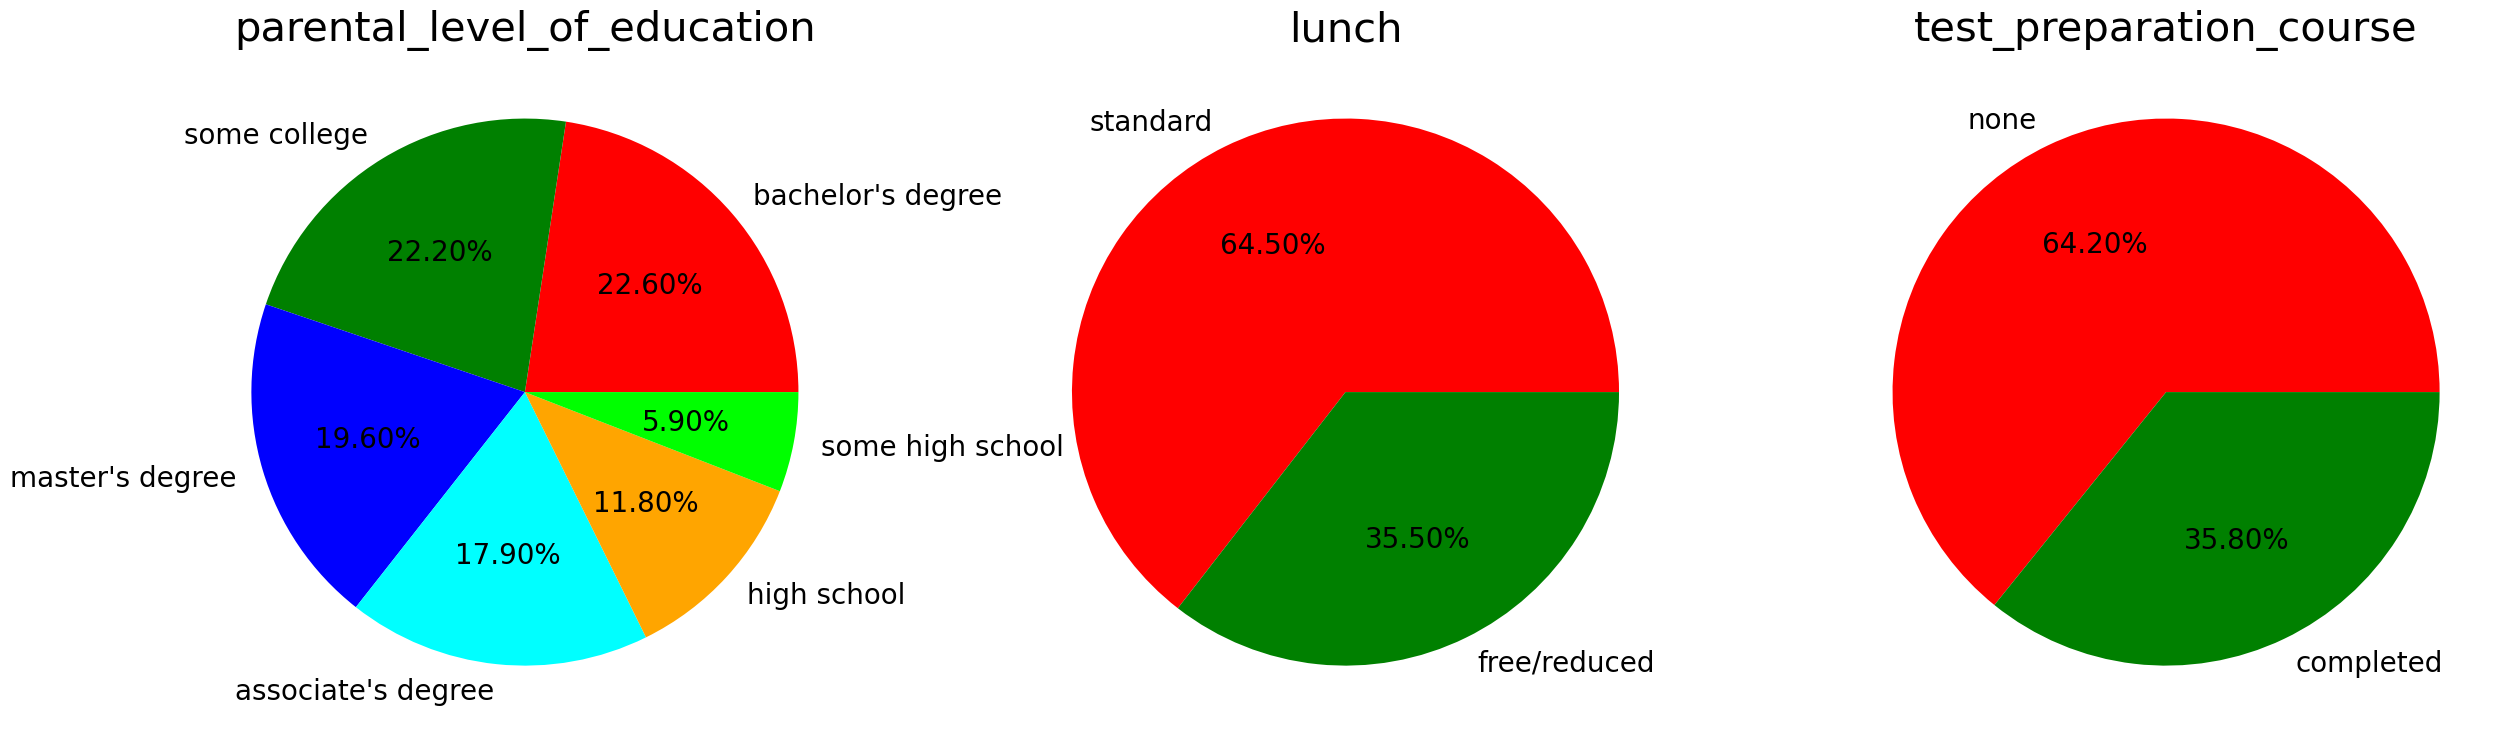

In [62]:


plt.subplot(1, 3, 1)
size = dataset['parental_level_of_education'].value_counts()
labels = "bachelor's degree", 'some college', "master's degree", "associate's degree",  'high school', 'some high school'
color = ['red', 'green', 'blue', 'cyan','orange', 'lime']
plt.pie(size, colors = color, labels = labels,autopct = '%2.2f%%',textprops={'fontsize': 20})
plt.title('parental_level_of_education', fontsize = 30)
plt.axis('off')



plt.subplot(1, 3, 2)
size = dataset['lunch'].value_counts()
labels = 'standard' , 'free/reduced'
color = ['red', 'green']
plt.pie(size, colors = color, labels = labels,autopct = '%2.2f%%',textprops={'fontsize': 20})
plt.title('lunch', fontsize = 30)
plt.axis('off')


plt.subplot(1, 3, 3)
size = dataset['test_preparation_course'].value_counts()
labels = 'none' , 'completed'
color = ['red', 'green']
plt.pie(size, colors = color, labels = labels,autopct = '%2.2f%%',textprops={'fontsize': 20})
plt.title('test_preparation_course', fontsize = 30)
plt.axis('off')